In [9]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from normalization import Normalizer
from algorithmsdp import AlgorithmDP

# Construct the full file path
#base_dir = '/Users/davidmoreno/Documents/DifPrivHealthCostPredict'
#os.chdir(base_dir)


file_path = 'C:/Users/David/Universidad de los andes/David Stiven Romero Grajales - Trabajo de Grado/Trabajo de Grado 1/Base de datos y descripción/Entrenamiento_cronicas_N.csv'


df = pd.read_csv(file_path)


In [10]:
t_i=df[df['Valor_Neto']!=0]

In [11]:
df['Valor_Neto_normalized'] = Normalizer.normalize_to_range(df['Valor_Neto'])
df['Valor_Neto_normalized'].describe()


count    996234.000000
mean         -0.999916
std           0.002023
min          -1.000000
25%          -1.000000
50%          -0.999980
75%          -0.999914
max           1.000000
Name: Valor_Neto_normalized, dtype: float64

In [6]:
from algorithmsdp import AlgorithmDP
# Example usage of duchi_solution
df['duchi'] = AlgorithmDP.duchi_solution(df['Valor_Neto_normalized'], 3)

# Example usage of piecewise_mechanism
df['piecewise'] = AlgorithmDP.piecewise_mechanism(df['Valor_Neto_normalized'], 3)



Description for epsilon=0.1:
count    996234.000000
mean          9.497653
std          10.022326
min          -0.049958
25%          -0.049958
50%          -0.049958
75%          20.016655
max          20.016655
Name: Valor_Neto_privacy_0.1, dtype: float64

Description for epsilon=0.5:
count    996234.000000
mean          1.392748
std           2.100556
min          -0.244919
25%          -0.244919
50%          -0.244919
75%           4.082988
max           4.082988
Name: Valor_Neto_privacy_0.5, dtype: float64

Description for epsilon=1.0:
count    996234.000000
mean          0.245440
std           1.167322
min          -0.462117
25%          -0.462117
50%          -0.462117
75%           2.163954
max           2.163954
Name: Valor_Neto_privacy_1.0, dtype: float64

Description for epsilon=2.0:
count    996234.000000
mean         -0.514128
std           0.671613
min          -0.761594
25%          -0.761594
50%          -0.761594
75%          -0.761594
max           1.313035
Name: Valo

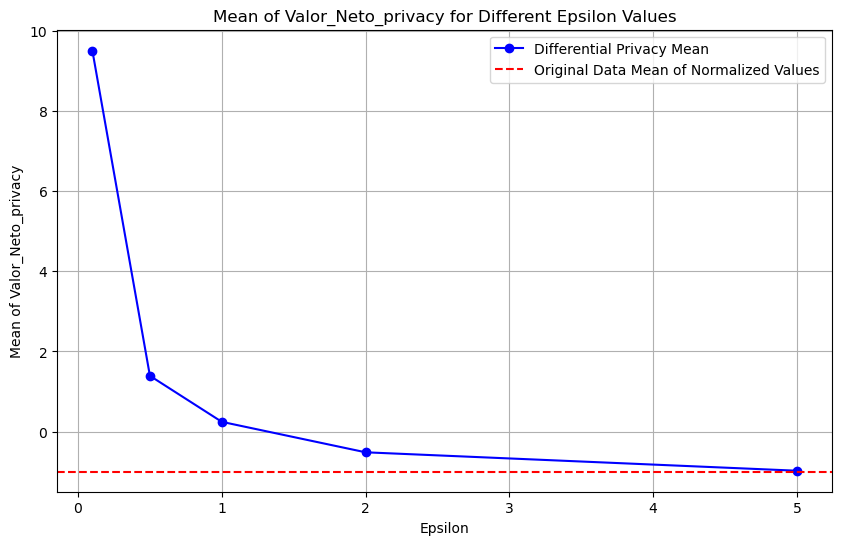

In [7]:
# Calculate the true mean of the normalized values
true_mean = df['Valor_Neto_normalized'].mean()

# Define the range of epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Apply the differential privacy solution and describe the results
means = []

for epsilon in epsilon_values:
    df[f'Valor_Neto_privacy_{epsilon}'] = AlgorithmDP.duchi_solution(df['Valor_Neto_normalized'], epsilon)
    description = df[f'Valor_Neto_privacy_{epsilon}'].describe()
    mean_value = description['mean']
    means.append(mean_value)
    print(f"Description for epsilon={epsilon}:\n{description}\n")

# Plot the different means
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, means, marker='o', linestyle='-', color='b', label='Differential Privacy Mean')
plt.axhline(y=true_mean, color='r', linestyle='--', label='Original Data Mean of Normalized Values')
plt.xlabel('Epsilon')
plt.ylabel('Mean of Valor_Neto_privacy')
plt.title('Mean of Valor_Neto_privacy for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()

### Piecewise Mechanism

Description for epsilon=0.1:
count    996234.000000
mean        -15.534206
std          23.587313
min         -40.008343
25%         -39.559308
50%         -20.498504
75%          -1.553716
max          40.008041
Name: Valor_Neto_privacy_0.1, dtype: float64

Description for epsilon=0.5:
count    996234.000000
mean         -3.529144
std           4.435842
min          -8.041623
25%          -7.656460
50%          -4.517303
75%          -1.392629
max           8.041603
Name: Valor_Neto_privacy_0.5, dtype: float64

Description for epsilon=1.0:
count    996234.000000
mean         -2.063724
std           2.064022
min          -4.082988
25%          -3.782626
50%          -2.543771
75%          -1.303577
max           4.082979
Name: Valor_Neto_privacy_1.0, dtype: float64

Description for epsilon=2.0:
count    996234.000000
mean         -1.370240
std           0.906895
min          -2.163954
25%          -1.981069
50%          -1.582280
75%          -1.184877
max           2.163929
Name: Valo

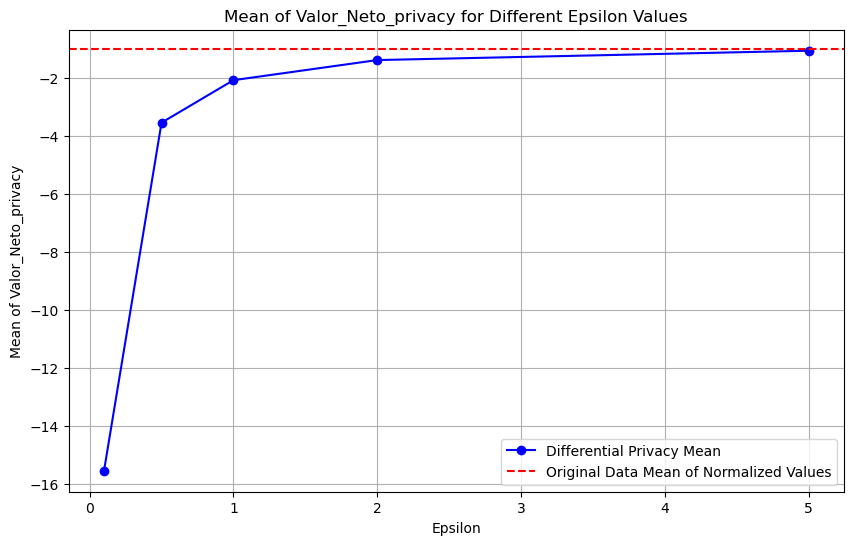

In [8]:
# Calculate the true mean of the normalized values
true_mean = df['Valor_Neto_normalized'].mean()

# Define the range of epsilon values
epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Apply the differential privacy solution and describe the results
means = []

for epsilon in epsilon_values:
    df[f'Valor_Neto_privacy_{epsilon}'] = AlgorithmDP.piecewise_mechanism(df['Valor_Neto_normalized'], epsilon)
    description = df[f'Valor_Neto_privacy_{epsilon}'].describe()
    mean_value = description['mean']
    means.append(mean_value)
    print(f"Description for epsilon={epsilon}:\n{description}\n")

# Plot the different means
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, means, marker='o', linestyle='-', color='b', label='Differential Privacy Mean')
plt.axhline(y=true_mean, color='r', linestyle='--', label='Original Data Mean of Normalized Values')
plt.xlabel('Epsilon')
plt.ylabel('Mean of Valor_Neto_privacy')
plt.title('Mean of Valor_Neto_privacy for Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.show()